Here is the Link 👉 [Google-Colab](https://colab.research.google.com/drive/1xvvEWC2fOVF_kG3Q8TM1DRlTioD4bhfn)

In [1]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# Download the Data through Kaggle API
from google.colab import files

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
!pip install torchviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4147 sha256=b7d1c47cb61d7e53bec27b3d312dc4c34b9788cae4c2df68b43c7ebc1b2f727a
  Stored in directory: /root/.cache/pip/wheels/29/65/6e/db2515eb1dc760fecd36b40d54df65c1e18534013f1c037e2e
Successfully built torchviz


In [4]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torchviz import make_dot

In [5]:
import os
from glob import glob
import shutil

In [6]:
# Using Kaggle API to Download the Dataset

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes


In [7]:
# Download the Dataset
!kaggle datasets download -d csafrit2/plant-leaves-for-image-classification

100% 6.55G/6.56G [01:00<00:00, 153MB/s]
100% 6.56G/6.56G [01:00<00:00, 116MB/s]


In [8]:
from zipfile import ZipFile
file_name = "/content/plant-leaves-for-image-classification.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')
  zip.extractall(path="/content")

Done


In [9]:
train_dir = '/content/Plants_2/train/'
test_dir = '/content/Plants_2/test/'

In [10]:
train_num_files=len([file for file in glob(str(train_dir)+"/**/*.JPG",recursive=True)])
test_num_files=len([file for file in glob(str(test_dir)+"/**/*.JPG",recursive=True)])
print("Training Images:", train_num_files)
print("Testing Images:", test_num_files)

Training Images: 4274
Testing Images: 110


In [11]:
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

batch_size = 16

trainset = torchvision.datasets.ImageFolder(root= train_dir, 
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.ImageFolder(root=test_dir,
                                       transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=True, num_workers=2)

classes = ('Alstonia Scholaris diseased (P2a)', 'Alstonia Scholaris healthy (P2b)', 'Arjun diseased (P1a)', 
           'Arjun healthy (P1b)', 'Bael diseased (P4b)','Basil healthy (P8)','Chinar diseased (P11b)','Chinar healthy (P11a)',
          'Gauva diseased (P3b)', 'Gauva healthy (P3a)', 'Jamun diseased (P5b)', 'Jamun healthy (P5a)','Jatropha diseased (P6b)',
           'Jatropha healthy (P6a)','Lemon diseased (P10b)','Lemon healthy (P10a)','Mango diseased (P0b)','Mango healthy (P0a)',
          'Pomegranate diseased (P9b)', 'Pomegranate healthy (P9a)', 'Pongamia Pinnata diseased (P7b)', 'Pongamia Pinnata healthy (P7a)')

In [ ]:
len(classes)

22

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt

def show_image_grid(images, title=None, figsize=(10, 10), imshow_kwargs={}):
    # Create a grid of images
    dataiter = iter(trainloader)
    images, labels = next(dataiter)
    grid = torchvision.utils.make_grid(images, nrow=int(len(images)**0.5), padding=2, normalize=True)
    
    # Convert the grid to a numpy array and transpose the channels to match the format expected by imshow
    grid = grid.permute(1, 2, 0).numpy()
    
    # Create a new figure and display the grid
    plt.figure(figsize=figsize)
    plt.imshow(grid, **imshow_kwargs)
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()
    
    

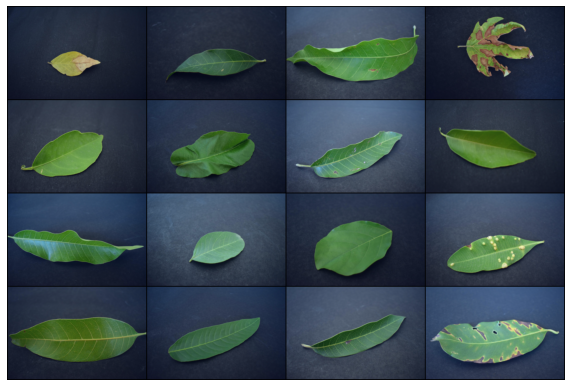

Arjun healthy (P1b) Mango diseased (P0b) Mango diseased (P0b) Jamun diseased (P5b) Mango diseased (P0b) Jamun diseased (P5b) Lemon healthy (P10a) Lemon diseased (P10b) Pongamia Pinnata healthy (P7a) Jatropha diseased (P6b) Lemon healthy (P10a) Bael diseased (P4b) Arjun diseased (P1a) Pomegranate diseased (P9b) Jamun diseased (P5b) Gauva diseased (P3b)


In [ ]:
# Set the Size

dataiter = iter(trainloader)
images, labels = next(dataiter)
batch_size = 16
channels = 3
height = 32
width = 32
images = torch.randn(batch_size, channels, height, width)

show_image_grid(images)

# print labels
print(' '.join(f'{classes[labels[j]]:4s}' for j in range(batch_size)))



In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2_1 = nn.Conv2d(6, 16, 5)

        self.conv2 = nn.Conv2d(16, 32, 3)
        # self.pool_2 = nn.MaxPool2d(2, 2)
        self.conv2_2 = nn.Conv2d(32, 64, 3)

        self.conv3 = nn.Conv2d(64, 128, 3)
        # self.pool_3 = nn.MaxPool2d(2, 2)
        self.conv2_3 = nn.Conv2d(128, 256, 3)
        
        self.fc1 = nn.Linear(256*3, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 22)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2_1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv2_2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv2_3(x)))
        
#         print(x.shape)

        
        x = x.reshape(-1, 256*3) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2_1): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2_2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv2_3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=768, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=22, bias=True)
)


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(100): 

    print(epoch, "Epoch ******************************** Done...")
    running_loss = 0.0
    for i, data in enumerate(trainloader):
#         print("hi")
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
#         print(inputs.shape,labels.shape)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

print('Finished Training')

0 Epoch ******************************** Done...
[1,   200] loss: 3.088
1 Epoch ******************************** Done...
[2,   200] loss: 3.070
2 Epoch ******************************** Done...
[3,   200] loss: 3.055
3 Epoch ******************************** Done...
[4,   200] loss: 3.043
4 Epoch ******************************** Done...
[5,   200] loss: 3.034
5 Epoch ******************************** Done...
[6,   200] loss: 3.030
6 Epoch ******************************** Done...
[7,   200] loss: 3.022
7 Epoch ******************************** Done...
[8,   200] loss: 3.020
8 Epoch ******************************** Done...
[9,   200] loss: 3.018
9 Epoch ******************************** Done...
[10,   200] loss: 3.016
10 Epoch ******************************** Done...
[11,   200] loss: 3.011
11 Epoch ******************************** Done...
[12,   200] loss: 3.009
12 Epoch ******************************** Done...
[13,   200] loss: 3.012
13 Epoch ******************************** Done...
[14,   

In [ ]:
PATH = './leaf_classification.pth'
torch.save(net.state_dict(), PATH)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


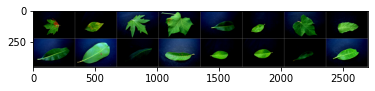

Classification Results:  Chinar diseased (P11b) Bael diseased (P4b) Chinar healthy (P11a) Jatropha diseased (P6b) Alstonia Scholaris healthy (P2b) Lemon diseased (P10b) Jatropha healthy (P6a) Basil healthy (P8) Alstonia Scholaris healthy (P2b) Jamun diseased (P5b)


In [ ]:
import cv2 
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('Classification Results: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(10)))

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(10)))

Predicted:  Pongamia Pinnata diseased (P7b) Bael diseased (P4b) Chinar healthy (P11a) Jatropha healthy (P6a) Alstonia Scholaris healthy (P2b) Lemon diseased (P10b) Jatropha diseased (P6b) Basil healthy (P8) Alstonia Scholaris healthy (P2b) Jamun healthy (P5a)


In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test folder images: {100 * correct // total} %')

Accuracy of the network on the test folder images: 69 %
